In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

In [189]:
ride_data = pd.read_csv("raw_data/ride_data.csv")
ave_fare_by_city = pd.DataFrame(ride_data.groupby("city").mean()).reset_index()
ride_numbers_by_city = pd.DataFrame(ride_data.groupby("city").count()).reset_index()

In [184]:
merge_ride_data = pd.merge(ave_fare_by_city, ride_numbers_by_city, on="city")
ride_data_df = merge_ride_data.loc[:, ["city", "fare_x", "ride_id_y"]]

In [13]:
city_data = pd.read_csv("raw_data/city_data.csv")

In [157]:
merge_city_data = pd.DataFrame(pd.merge(ride_data_df, city_data, on="city"))
merge_city_data = merge_city_data.rename(columns={"city":"City", "fare_x":"Average Fare ($)", "ride_id_y": "Number of Rides", \
                                                  "driver_count":"Number of Drivers", "type":"City Type"})
merge_city_data.head()

,City,Average Fare ($),Number of Rides,Number of Drivers,City Type
0,Alvarezhaven,23.928710,31,21,Urban
1,Alyssaberg,20.609615,26,67,Urban
2,Anitamouth,37.315556,9,16,Suburban
3,Antoniomouth,23.625000,22,21,Urban
4,Aprilchester,21.981579,19,49,Urban


In [96]:
#create three different data frames for Urban, Suburban and Rural
urban_df = merge_city_data.loc[merge_city_data['City Type'] == 'Urban']
suburban_df = merge_city_data.loc[merge_city_data['City Type'] == 'Suburban']
rural_df = merge_city_data.loc[merge_city_data['City Type'] == 'Rural']

True


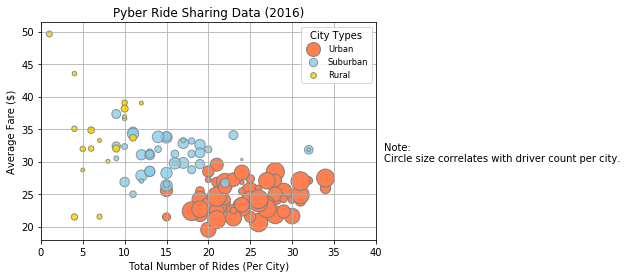

In [180]:
ax1 = urban_df.plot.scatter(x='Number of Rides', y='Average Fare ($)', \
                              s=urban_df['Number of Drivers']*5, \
                              color='coral', alpha=1, edgecolors="grey", \
                              linewidth=1, label='Urban');

ax2 = suburban_df.plot.scatter(x='Number of Rides', y='Average Fare ($)', \
                         s=suburban_df['Number of Drivers']*5, \
                         color='skyblue', alpha=0.8, edgecolors="grey", \
                         linewidth=1, label='Suburban', ax=ax1);

ax3 = rural_df.plot.scatter(x='Number of Rides', y='Average Fare ($)', \
                              s=rural_df['Number of Drivers']*5, \
                              color='gold', alpha=0.9, edgecolors="grey", \
                              linewidth=1, label='Rural', ax=ax1);

print(ax1 == ax2 == ax3) 

plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.xlim((0,40))
plt.grid(True)


lgnd = plt.legend(fontsize="small", mode="Expanded", 
                   numpoints=1, scatterpoints=1, 
                   loc="best", title="City Types", 
                   labelspacing=0.5)

plt.text(41,30, "Note:\nCircle size correlates with driver count per city.")

plt.savefig("raw_data/Fig1.png")

plt.show()

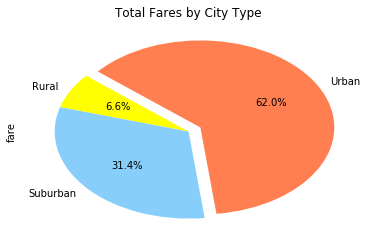

In [241]:
#total fares by city type
merge_data = pd.DataFrame(pd.merge(ride_data, city_data, on="city"))
city_type_percentage = 100 * merge_data.groupby(["type"]).sum()["fare"] / merge_data["fare"].sum()

city_type_percentage.plot.pie(colors= ['yellow', 'lightskyblue', 'coral'], explode=[0,0,0.1], autopct="%1.1f%%", startangle=140)

plt.title("Total Fares by City Type")

plt.show()

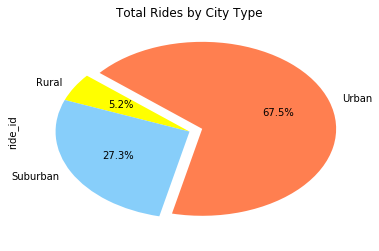

In [244]:
#total rides by city type

ride_type_percentage = 100 * merge_data.groupby(["type"]).count()["ride_id"] / merge_data["ride_id"].count()

ride_type_percentage.plot.pie(colors= ['yellow', 'lightskyblue', 'coral'], explode=[0,0,0.1], autopct="%1.1f%%", startangle=140)

plt.title("Total Rides by City Type")

plt.show()

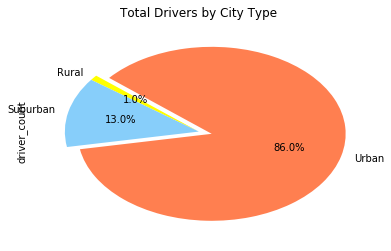

In [248]:
#total drivers by city type

driver_type_percentage = 100 * merge_data.groupby(["type"]).sum()["driver_count"] / merge_data["driver_count"].sum()

driver_type_percentage.plot.pie(colors= ['yellow', 'lightskyblue', 'coral'], explode=[0,0,0.1], autopct="%1.1f%%", startangle=140)

plt.title("Total Drivers by City Type")

plt.show()